In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Reading and Analysis

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Unique Values of Columns

In [11]:
for i in df.columns:
    print(i,"=>",len(df[i].unique()))

age => 41
sex => 2
cp => 4
trtbps => 49
chol => 152
fbs => 2
restecg => 3
thalachh => 91
exng => 2
oldpeak => 40
slp => 3
caa => 5
thall => 4
output => 2


# Visualization

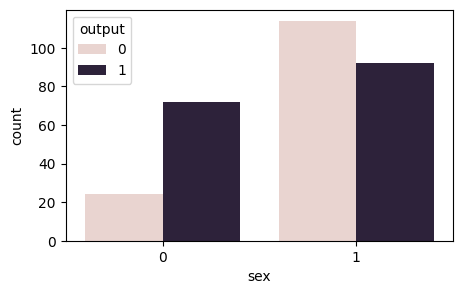

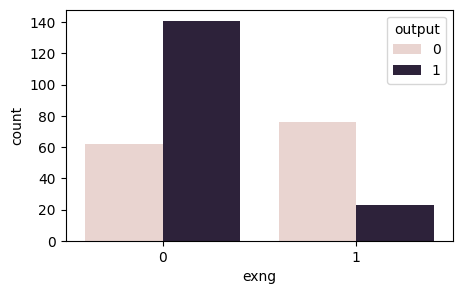

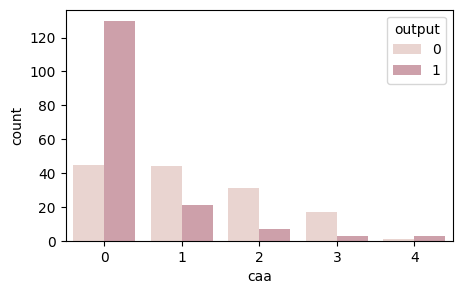

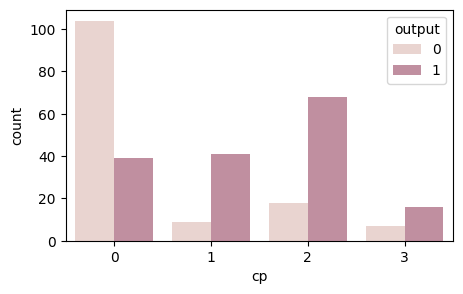

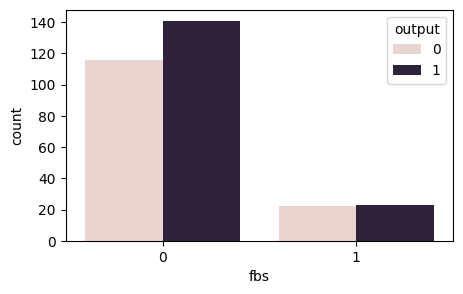

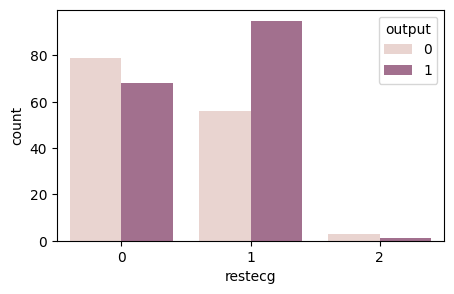

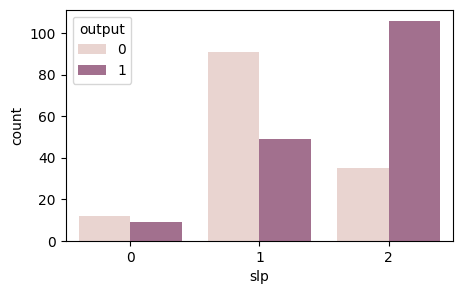

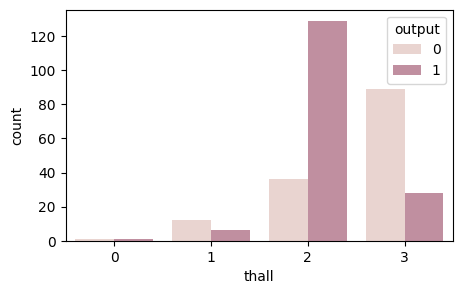

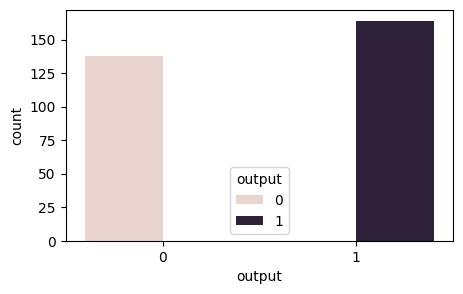

In [12]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall',"output"]

for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=df[cat_cols], hue="output",palette=sns.cubehelix_palette(len(df[col].value_counts())))

### Continuing Features Analysis

#### Pair Plot

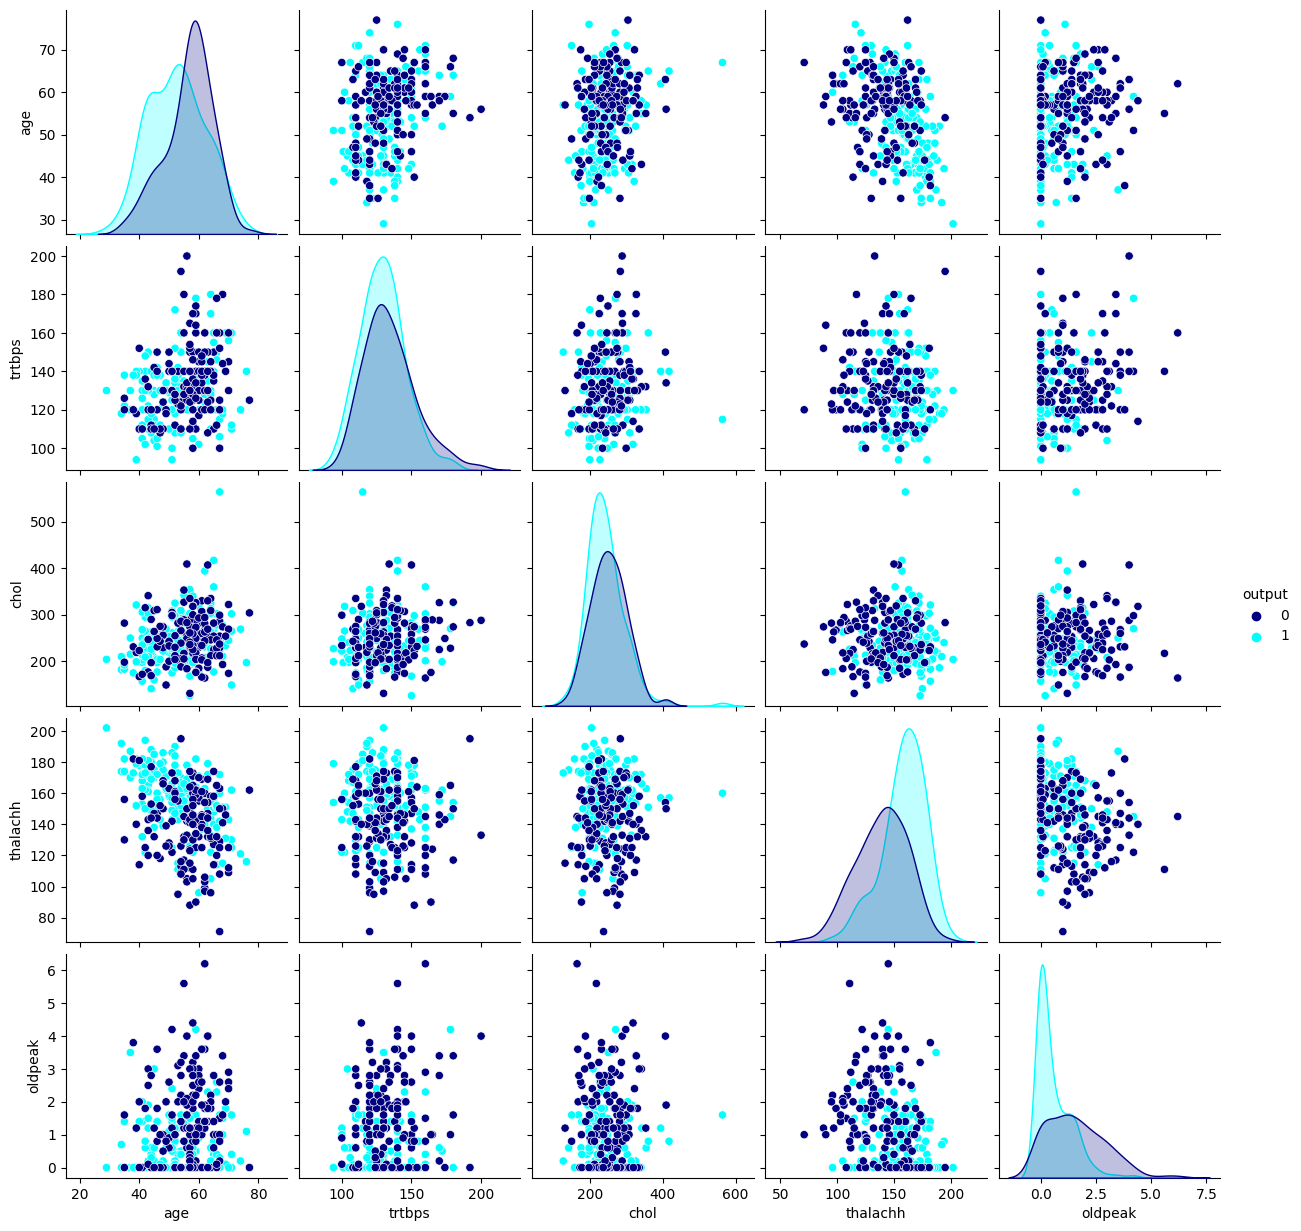

In [13]:
con_columns = ["age","trtbps","chol","thalachh","oldpeak","output"]  # Continuing Features

sns.pairplot(df[con_columns], hue="output", palette=sns.color_palette(["#000080","#00ffff"]))

#### Swarm Plot

In [14]:
from sklearn.preprocessing import RobustScaler
df_continuing = df[con_columns]

scaler = RobustScaler()
df_continuing = scaler.fit_transform(df_continuing.drop(columns="output"))
df_continuing

array([[ 0.57692308,  0.75      , -0.11764706, -0.07633588,  0.9375    ],
       [-1.42307692,  0.        ,  0.14901961,  1.05343511,  1.6875    ],
       [-1.11538462,  0.        , -0.57254902,  0.59541985,  0.375     ],
       ...,
       [ 0.96153846,  0.7       , -0.74509804, -0.35114504,  1.625     ],
       [ 0.11538462,  0.        , -1.71764706, -1.14503817,  0.25      ],
       [ 0.11538462,  0.        , -0.07058824,  0.65648855, -0.5       ]])

In [15]:
df_dummy = pd.DataFrame(df_continuing, columns = con_columns[:-1])
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.576923,0.75,-0.117647,-0.076336,0.9375
1,-1.423077,0.00,0.149020,1.053435,1.6875
2,-1.115385,0.00,-0.572549,0.595420,0.3750
3,0.038462,-0.50,-0.070588,0.778626,0.0000
4,0.115385,-0.50,1.780392,0.320611,-0.1250


In [16]:
df_dummy = pd.concat([df_dummy, df.loc[:, "output"]], axis = 1)
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.576923,0.75,-0.117647,-0.076336,0.9375,1.0
1,-1.423077,0.00,0.149020,1.053435,1.6875,1.0
2,-1.115385,0.00,-0.572549,0.595420,0.3750,1.0
3,0.038462,-0.50,-0.070588,0.778626,0.0000,1.0
4,0.115385,-0.50,1.780392,0.320611,-0.1250,1.0


In [17]:
df_melt = pd.melt(df_dummy,id_vars="output",var_name="features",value_name="values")
df_melt.head()

,output,features,values
0,1.0,age,0.576923
1,1.0,age,-1.423077
2,1.0,age,-1.115385
3,1.0,age,0.038462
4,1.0,age,0.115385


<Axes: xlabel='features', ylabel='values'>

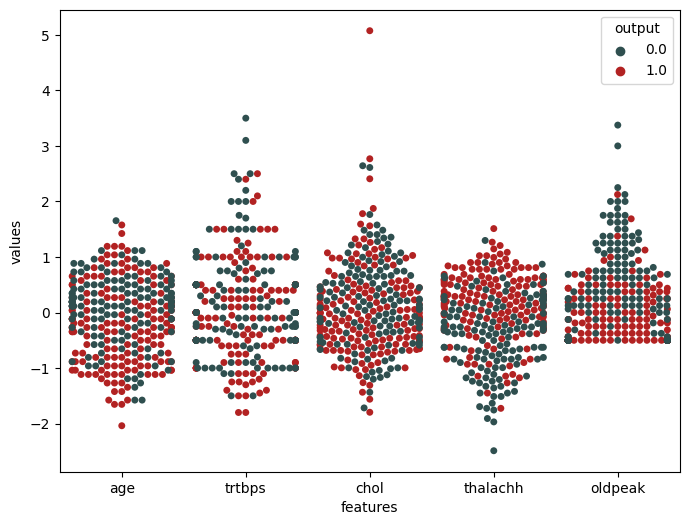

In [18]:
plt.figure(figsize=(8,6))
sns.swarmplot(x="features",y="values",data=df_melt,hue="output",palette=sns.color_palette(["#2f4f4f","#b22222"]))

#### Correlation Analysis with Heatmap

<Axes: >

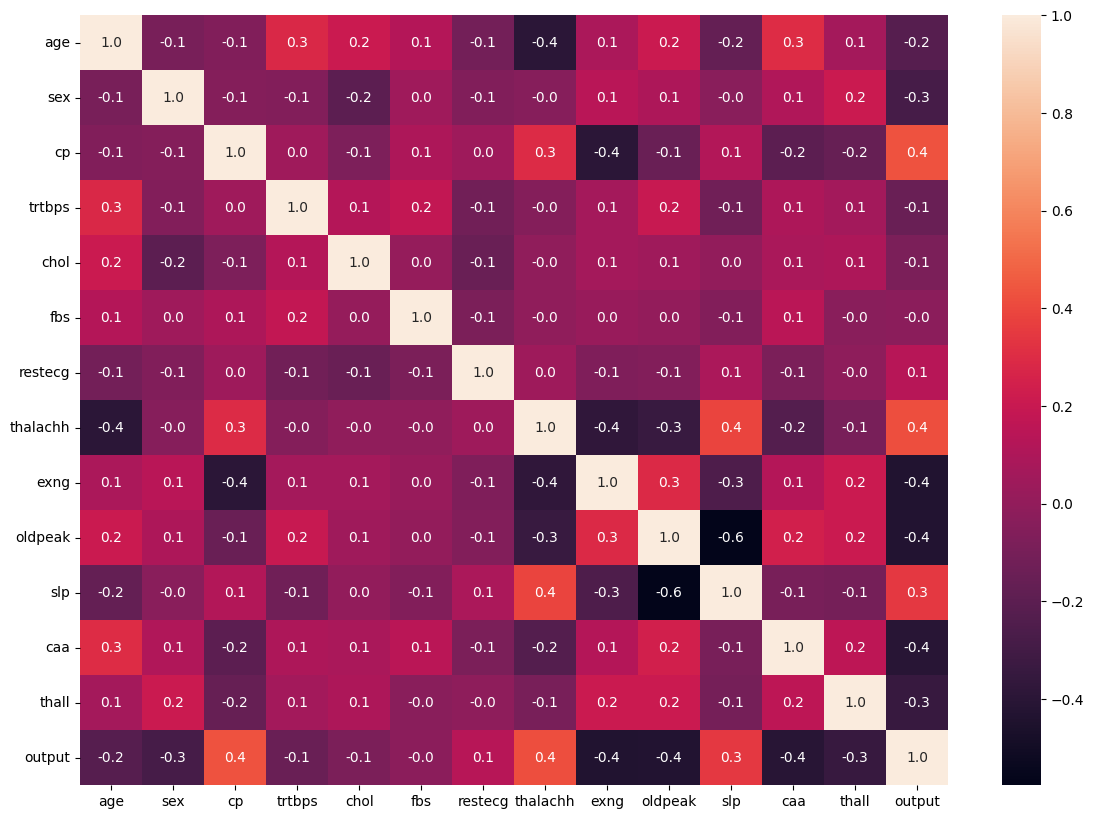

In [19]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".1f")

# Future Selection

In [20]:
cat_cols = ['sex','exng','caa','cp','slp','thall']
con_cols = ["age","thalachh","oldpeak"]
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)
x = df.drop(columns=['output',"chol","trtbps","fbs",'restecg'])
y = df['output']
x[con_cols] = scaler.fit_transform(x[con_cols])

# Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (241, 17)
Test_x : (61, 17)
Train_y : (241,)
Test_y : (61,)


# Logistic Regression

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
logreg0 = LogisticRegression()
grid= {"C": np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_cv = GridSearchCV(logreg0,grid,cv=10)
logreg_cv.fit(x,y)
print("Best parameters of Logistic Regression :",logreg_cv.best_params_)

Best parameters of Logistic Regression : {'C': 10.0, 'penalty': 'l2'}


In [23]:
logreg = LogisticRegression(C=logreg_cv.best_params_["C"] , penalty=logreg_cv.best_params_["penalty"])
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x,test_y))

Logistic Regression Accuracy : 0.9180327868852459


# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn0 = KNeighborsClassifier()
knn_cv = GridSearchCV(knn0, {"n_neighbors": np.arange(1,50)}, cv=10)
knn_cv.fit(x,y)
print("Best parameters of KNN :",knn_cv.best_params_)

Best parameters of KNN : {'n_neighbors': 5}


In [25]:
knn = KNeighborsClassifier(n_neighbors=knn_cv.best_params_["n_neighbors"])
knn.fit(train_x,train_y)
print("KNN Accuracy :",knn.score(test_x,test_y))

KNN Accuracy : 0.8852459016393442


# SVC

In [26]:
from sklearn.svm import SVC
grid = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}
svm0 = SVC(random_state=42)
svm_cv = GridSearchCV(svm0, grid, cv=10)
svm_cv.fit(x,y)
print("Best parameters of SVC :",svm_cv.best_params_)

Best parameters of SVC : {'C': 7, 'gamma': 0.1}


In [27]:
svm = SVC(C=svm_cv.best_params_["C"], gamma=svm_cv.best_params_["gamma"],random_state=42)
svm.fit(train_x,train_y)
print("SVC Accuracy :",svm.score(test_x,test_y))

SVC Accuracy : 0.9344262295081968


# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(train_x,train_y)
print("Decision Tree Classifier Accuracy :",tree.score(test_x,test_y))

Decision Tree Classifier Accuracy : 0.7704918032786885


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_x,train_y)
print("Random Forest Classifier Accuracy :",rf.score(test_x,test_y))

Random Forest Classifier Accuracy : 0.8852459016393442


# Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
algorithms = [logreg,knn,tree,rf,svm]

for alg in algorithms:
    accuracies = cross_val_score(estimator=alg, X=x, y=y, cv=10)
    print("{0}: \t {1}".format(alg,accuracies.mean()))

LogisticRegression(C=10.0): 	 0.8606451612903226
KNeighborsClassifier(): 	 0.8345161290322581
DecisionTreeClassifier(): 	 0.7219354838709677
RandomForestClassifier(): 	 0.817741935483871
SVC(C=7, gamma=0.1, random_state=42): 	 0.860752688172043


# Comparison Table

In [31]:
models = []
models.append(('MODEL NAME','ACCURACY'))
models.append(('LR', logreg.score(test_x,test_y)))
models.append(('KNN', knn.score(test_x,test_y)))
models.append(('SVC', svm.score(test_x,test_y)))
models.append(('DT', tree.score(test_x,test_y)))
models.append(('RF', rf.score(test_x,test_y)))
models

[('MODEL NAME', 'ACCURACY'),
 ('LR', 0.9180327868852459),
 ('KNN', 0.8852459016393442),
 ('SVC', 0.9344262295081968),
 ('DT', 0.7704918032786885),
 ('RF', 0.8852459016393442)]